In [106]:
# importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Procesamiento de Datos

In [107]:
# obtener el conjunto de datos
df = pd.read_csv('data.csv')

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [109]:
df.head(5)

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [110]:
df["Diet"].unique()

array(['Average', 'Unhealthy', 'Healthy'], dtype=object)

In [111]:
# Verify if there are any null values
print(df.isna().sum())

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64


## Transformación de Datos


In [112]:
from sklearn.preprocessing import MinMaxScaler

# Seleccionar las características relevantes para el SOM (Age, Cholesterol, Blood Pressure, ...)
features = [
    # "Patient ID",
    "Age",
    "Sex",
    "Cholesterol",
    "Blood Pressure",
    "Heart Rate",
    "Diabetes",
    "Family History",
    "Smoking",
    "Alcohol Consumption",
    "Exercise Hours Per Week",
    "Diet",
    "Previous Heart Problems",
    "Sedentary Hours Per Day",
    "BMI",
    "Physical Activity Days Per Week",
    "Sleep Hours Per Day",
    "Heart Attack Risk",
]
df = df[features]

# Dividir la columna 'Blood Pressure' en dos columnas separadas
df[["Systolic Pressure", "Diastolic Pressure"]] = df["Blood Pressure"].str.split(
    "/", expand=True
)
df.drop(columns=["Blood Pressure"], inplace=True)

# Convertir la columna "Diet" (['Average', 'Unhealthy', 'Healthy']) a numerico
df["Diet"] = df["Diet"].apply(
    lambda x: 0 if x == "Unhealthy" else 1 if x == "Average" else 2
)

# Convertir las columnas a valores numéricos}
# df["Patient ID"] = df["Patient ID"].apply(lambda x: x[3:])

df["Systolic Pressure"] = pd.to_numeric(df["Systolic Pressure"])
df["Diastolic Pressure"] = pd.to_numeric(df["Diastolic Pressure"])
df["Sex"] = df["Sex"].apply(lambda x: 1 if x == "Male" else 0)

# Model SOM

In [113]:
# Import the model of SOM
from minisom import MiniSom

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df)

In [114]:
# Initialize the SOM
som = MiniSom( x = 10, y = 10, input_len = 18, sigma = 1.0, learning_rate = 0.5)

In [115]:
# Initialize the weights
som.random_weights_init(X)

In [116]:
# Train your model
som.train_random(data = X, num_iteration = 1000)

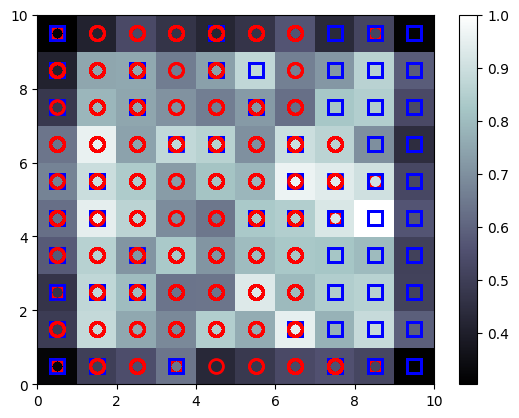

In [117]:
# Make the map of the SOM
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o' , 's']
colors = ['r', 'b']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

# Model Perceptron


In [118]:
from sklearn.linear_model import Perceptron

In [119]:
df.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Sedentary Hours Per Day,BMI,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic Pressure,Diastolic Pressure
0,67,1,208,72,0,0,1,0,4.168189,1,0,6.615001,31.251233,0,6,0,158,88
1,21,1,389,98,1,1,1,1,1.813242,0,1,4.963459,27.194973,1,7,0,165,93
2,21,0,324,72,1,0,0,0,2.078353,2,1,9.463426,28.176571,4,4,0,174,99
3,84,1,383,73,1,1,1,1,9.828130,1,1,7.648981,36.464704,3,4,0,163,100
4,66,1,318,93,1,1,1,0,5.804299,0,1,1.514821,21.809144,1,5,0,91,88


In [120]:
# Split the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop("Heart Attack Risk", axis=1), df["Heart Attack Risk"], random_state=0
)

In [121]:
# Eliminamos el Id del pasajero en el conjunto de datos de prueba
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6572, 17), (2191, 17), (6572,), (2191,))

In [122]:
# Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
acc_perceptron

64.14